<img style="float: left;;" src='Figures/alinco.png' /></a>
# <center> <font color= #000047> Módulo III: Aprendizaje Superviado: Red Neuronal Perceptrón </font> </center>


Las redes neuronales artificiales (RNA) constituyen un paradigma de computación inspirado en las <a href="https://es.wikipedia.org/wiki/Neurona">neuronas</a> biológicas y su interconexión. Las neuronas biológicas son células compuestas principalmente de tres partes: soma (cuerpo celular), dendritas (canales de entrada) y axón (canal de salida). Descrito de una forma muy simplificada, las neuronas transmiten información a través de procesos electroquímicos. Cuando una neurona recibe, a través de las denritas, una cantidad de estímulos mayor a un cierto umbral, ésta se despolariza excitando, a través del axón, a otras neuronas próximas conectadas a través de las sinapsis.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Perceptr%C3%B3n_5_unidades.svg/1280px-Perceptr%C3%B3n_5_unidades.svg.png" width="400" style="display:block; margin:auto;">


Inspirados por esta idea se concibió el modelo de <a href="https://es.wikipedia.org/wiki/Neurona_de_McCulloch-Pitts">neurona artificial</a>. Fundamentalmente, consiste en una unidad de cálculo que admite como entrada un vector de características $\vec{e}$ cuyos valores se suman de forma ponderada mediante unos pesos $\vec{w}$ y, si esta suma supera un cierto umbral $\theta$, genera un cierto valor de salida, por ejemplo $1$ y, si no lo supera, genera otro valor, por ejemplo, un $0$. Cuando la neurona está sola, es decir, no conectada a otras conformando una red, actúa como un clasificador lineal. El **perceptrón** es el modelo más simple de una red neuronal artificial. Fue propuesto por Frank Rosenblatt en 1958 y es la base de las redes neuronales modernas.


## ¿Qué es un Perceptrón?

Un perceptrón es un algoritmo supervisado de clasificación binaria. Su objetivo es encontrar una frontera de decisión lineal que separe dos clases.

### Estructura de un Perceptrón

Un perceptrón consta de:
- Un vector de entradas $\mathbf{x} = [x_1, x_2, ..., x_n]$
- Un vector de pesos $\mathbf{w} = [w_1, w_2, ..., w_n]$
- Un sesgo (bias) $b$
- Una función de activación (usualmente el escalón de Heaviside)

La salida del perceptrón se calcula como:

$$
y = f(\mathbf{w} \cdot \mathbf{x} + b)
$$

donde $f$ es la función de activación:

$$
f(z) = \begin{cases}
1 & \text{si } z \geq 0 \\
0 & \text{si } z < 0
\end{cases}
$$

## Funcionamiento del Perceptrón

1. **Inicialización:** Se inicializan los pesos y el sesgo, generalmente con valores pequeños aleatorios.
2. **Cálculo de la salida:** Para cada muestra de entrada, se calcula la salida usando la función de activación.
3. **Actualización de pesos:** Si la predicción es incorrecta, se actualizan los pesos y el sesgo según la regla de aprendizaje:

$$
w_j := w_j + \eta (y_{true} - y_{pred}) x_j
$$

$$
b := b + \eta (y_{true} - y_{pred})
$$

donde $\eta$ es la tasa de aprendizaje.

Este proceso se repite para todas las muestras y durante varias épocas hasta que el modelo converge.

## Implementación desde cero con Numpy

Vamos a implementar un perceptrón simple para resolver el problema lógico AND.

In [1]:
import numpy as np

# Datos de entrada (AND lógico)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 0, 0, 1])

# Inicialización de pesos y bias
np.random.seed(42)
w = np.random.randn(2)
b = 0.0
lr = 0.1

def step(z):
    return 1 if z >= 0 else 0

# Entrenamiento
for epoch in range(20):
    for xi, yi in zip(X, y):
        z = np.dot(w, xi) + b
        y_pred = step(z)
        w += lr * (yi - y_pred) * xi
        b += lr * (yi - y_pred)

print('Pesos finales:', w)
print('Bias final:', b)

# Prueba
for xi in X:
    z = np.dot(w, xi) + b
    print(f"Entrada: {xi}, Salida predicha: {step(z)}")

Pesos finales: [0.29671415 0.0617357 ]
Bias final: -0.30000000000000004
Entrada: [0 0], Salida predicha: 0
Entrada: [0 1], Salida predicha: 0
Entrada: [1 0], Salida predicha: 0
Entrada: [1 1], Salida predicha: 1


## Visualización de la frontera de decisión

Vamos a graficar la frontera de decisión aprendida por el perceptrón para el problema AND.

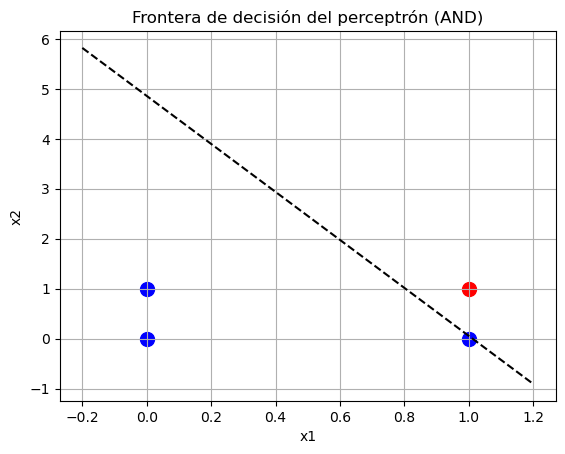

In [2]:
import matplotlib.pyplot as plt

# Graficar puntos
for xi, yi in zip(X, y):
    plt.scatter(xi[0], xi[1], c='red' if yi==1 else 'blue', s=100)

# Frontera de decisión: w1*x1 + w2*x2 + b = 0
x1_vals = np.linspace(-0.2, 1.2, 10)
x2_vals = -(w[0]*x1_vals + b)/w[1]
plt.plot(x1_vals, x2_vals, 'k--')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Frontera de decisión del perceptrón (AND)')
plt.grid(True)
plt.show()

## Ejemplo práctico con Pandas y Sklearn

Ahora usaremos el perceptrón de `sklearn` para clasificar el famoso dataset de Iris (solo dos clases para simplificar).

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar datos
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Usar solo dos clases (setosa y versicolor)
df = df[df['target'] < 2]
X = df[['sepal length (cm)', 'sepal width (cm)']].values
y = df['target'].values

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar perceptrón
clf = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
clf.fit(X_train, y_train)

# Evaluar
y_pred = clf.predict(X_test)
print('Precisión en test:', accuracy_score(y_test, y_pred))

Precisión en test: 1.0


## Visualización de la frontera de decisión en Iris

Graficamos la frontera de decisión aprendida por el perceptrón en el dataset Iris (dos clases).

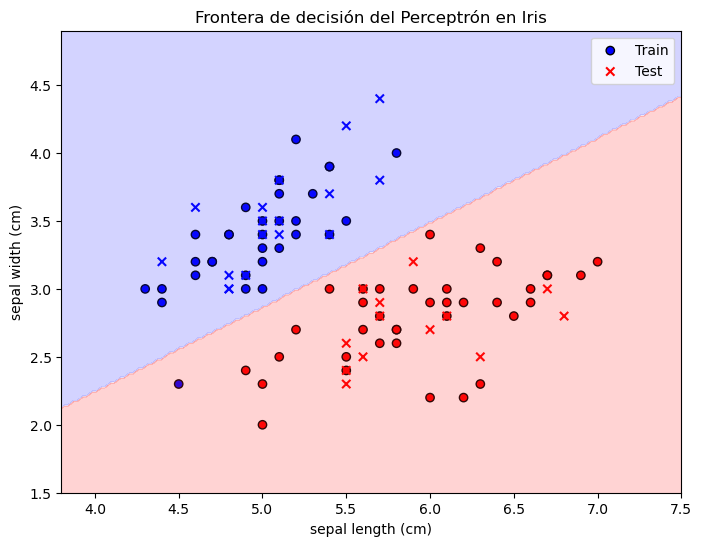

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Graficar puntos
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr', edgecolor='k', label='Train')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr', marker='x', label='Test')

# Frontera de decisión
x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Frontera de decisión del Perceptrón en Iris')
plt.legend()
plt.show()